# BASIC LINEAR MODEL: EDSA Apple Prices Challenge

## Table Of Contents

* [1. Introduction](#Intro)
     - [1.1 Context](Context)
     - [1.2 Problem Statement](#Problem_Statement)
     - [1.3 Data Description](#Datasets)
* [2. Data Cleaning and Exploration](#EDA)
* [3. Feature Engineerin](#Feature_Selection)
* [4. Model Fitting](#Model_Fitting)
* [5. Conclusion](#Conclusion)

## 1. Introduction
### 1.1 Context
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season? 

### 1.2 Problem Statement
With the context given, we are being challenged with the task of creating a Machine Learning model that is able to accurately predict how much a kilogram of Golden Delicious Apples will cost, given certain parameters. 

An accurate solution to this challenge will be very helpful for users of the system being able to determine how much stock to have on hand and what price to set the Golden Delicious Apples.

### 1.3 Data Description
#### * Data Source
The collection of this data which we use as our data source was obtained from Durban Fresh Produce Market

#### * Input Files
- df-train_set.csv - The training split of the dataset, denoted as "train_data" in our code.
- df-test_set.csv - The test split of the dataset, denoted as "test_data" in our code.
- sample_submission.csv - Sample of the submission format for the hackathon.

## 2. Data Cleaning and Exploration

### 2.1 Import Necessary Libraries/Packages

In [1]:
# Importing Libraries

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
import numpy as np
from scipy import stats
import math
import pickle
import warnings
warnings.filterwarnings('ignore')

### 2.2 Loading and viewing data

First we'll load and take a look at he first few rows of our training and testing data

In [2]:
# Importing data from csv files using the read_csv() fuction in the pandas library

train = pd.read_csv('Data/df-train_set.csv')
test = pd.read_csv('Data/df-test_set.csv')

In [3]:
# Looking at the first 5 entries in the train dataset to evaluate columns and identify numerical and categorical predictors

train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
# Calculating the sum of missing values for each column in the training dataset

train.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [5]:
# Looking at data types of each of the columns of the train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [6]:
# Looking at data types of each of the columns of the test data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [7]:
test.Commodities.head()

0    APPLE GOLDEN DELICIOUS
1    APPLE GOLDEN DELICIOUS
2    APPLE GOLDEN DELICIOUS
3    APPLE GOLDEN DELICIOUS
4    APPLE GOLDEN DELICIOUS
Name: Commodities, dtype: object

Looking at both the train and test datasets we can see that the test dataset only has one commodity ("APPLE GOLDEN DELICIOUS") whereas the training set has multiple.
We will filter the training set by only extracting rows with "Commodities" as "APPLE GOLDEN DELICIOUS" and then drop the "Commodities" column from both train and test sets.

In [8]:
#filter the dataset for only Golden Delicious Apples

golden_train = train[train.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]
golden_train.drop("Commodities", axis=1, inplace=True)

## Univariate Analysis: Non-Graphical

The first univariate analysis will be non-graphical. This is where we will be looking at the descriptive statistics of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

    - df.describe()

This command will provide the mean, standard deviation and a five number summary of each numerical feature.
The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot.

Individual statistical measures can also be calculated by using the following commands:

    - df.count()
    - df.mean()
    - df.std()
    - df.min()
    - df.quantile([0.25, 0.5, 0.75], axis = 0)
    - df.median()
    - df.max()

The three measures for central tendency are the mode, mean and median. The command to determine the mode is:

    - df.mode()

In [9]:
golden_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [10]:
golden_train.avg_price_per_kg.describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

Additional statistical measures that can be calculated are kurtosis and skew. 

Both kurtosis and skew are important statistical terms to be familiar with in data science. Kurtosis is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.  Skew will indicate how symmetrical your data is. Below is a table that explains the range of values with regards to skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
     For a more detailed explanation on skew and kurtosis read <a href="https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa%22%3Ehere</a>.
</div>


The commands used to determine the skew and kurtosis of data are:

    - df.skew()
    - df.kurtosis()

In [11]:
golden_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [12]:
golden_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

In [13]:
golden_train.avg_price_per_kg.skew()

0.08245241812963358

In [14]:
golden_train.avg_price_per_kg.kurtosis()

1.0429206643214481

### Univariate Analysis: Graphical

You can look at the distribution of any numerical feature by using the following plots:

    - histogram
    - density plot
    - box plot

#### Histogram and Density Plot

For displaying a histogram and density plot we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time.

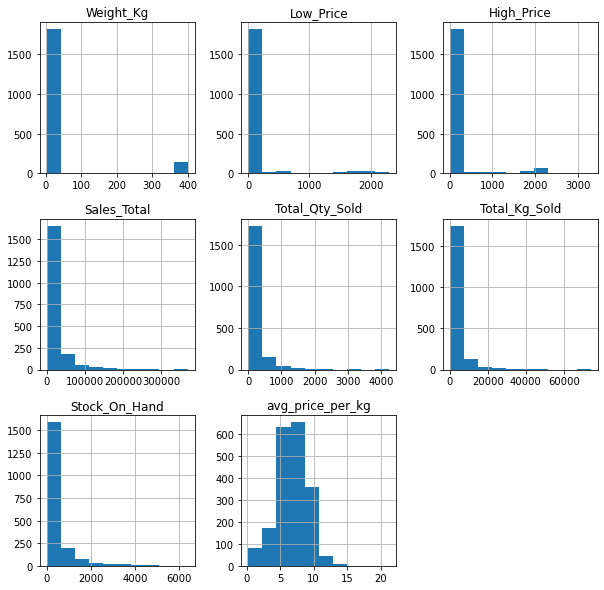

In [15]:
# create a list of all numerical features
features = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg']

golden_train[features].hist(figsize=(10,10));

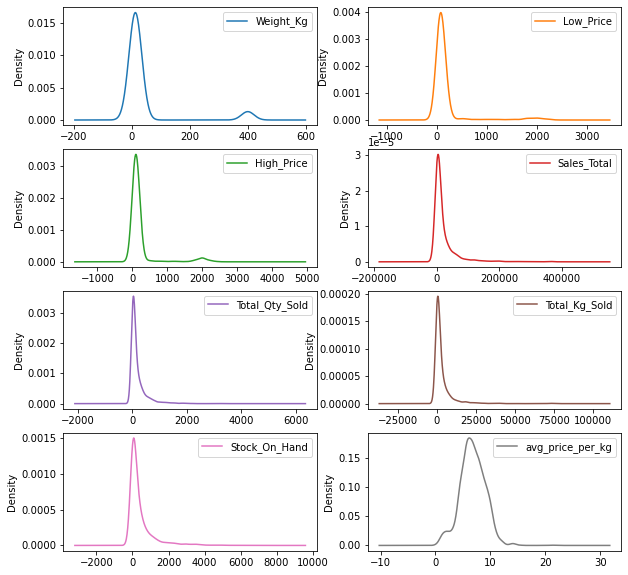

In [16]:
golden_train[features].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(10, 10));

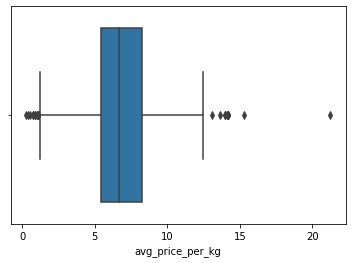

In [17]:
sns.boxplot(x='avg_price_per_kg', data = golden_train);

## Multivariate Analysis: Non-Graphical 

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases.

In [18]:
golden_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


### Multivariate Analysis: Graphical

For the multivariate graphical analysis the following visualisations will be considered:

    - Heatmap
    - Scatter Plot
    - Pair Plot
    - Joint Plot

#### Heatmap

The relationship between features can also be displayed graphically using a heatmap. The Seaborn library will be used for this basic heatmap visualisation. 

The correlation coefficient value will be displayed on the heatmap using the vmin and vmax parameters.

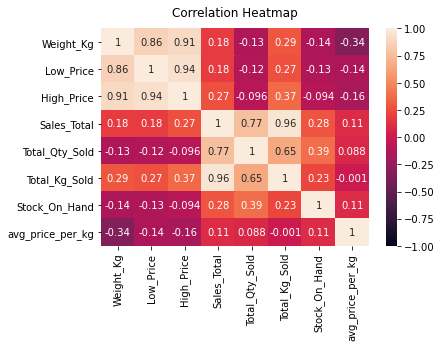

In [19]:
heatmap = sns.heatmap(golden_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Pair Plot
A pair plot can be used to visualise the relationships between all the numerical features at the same time.

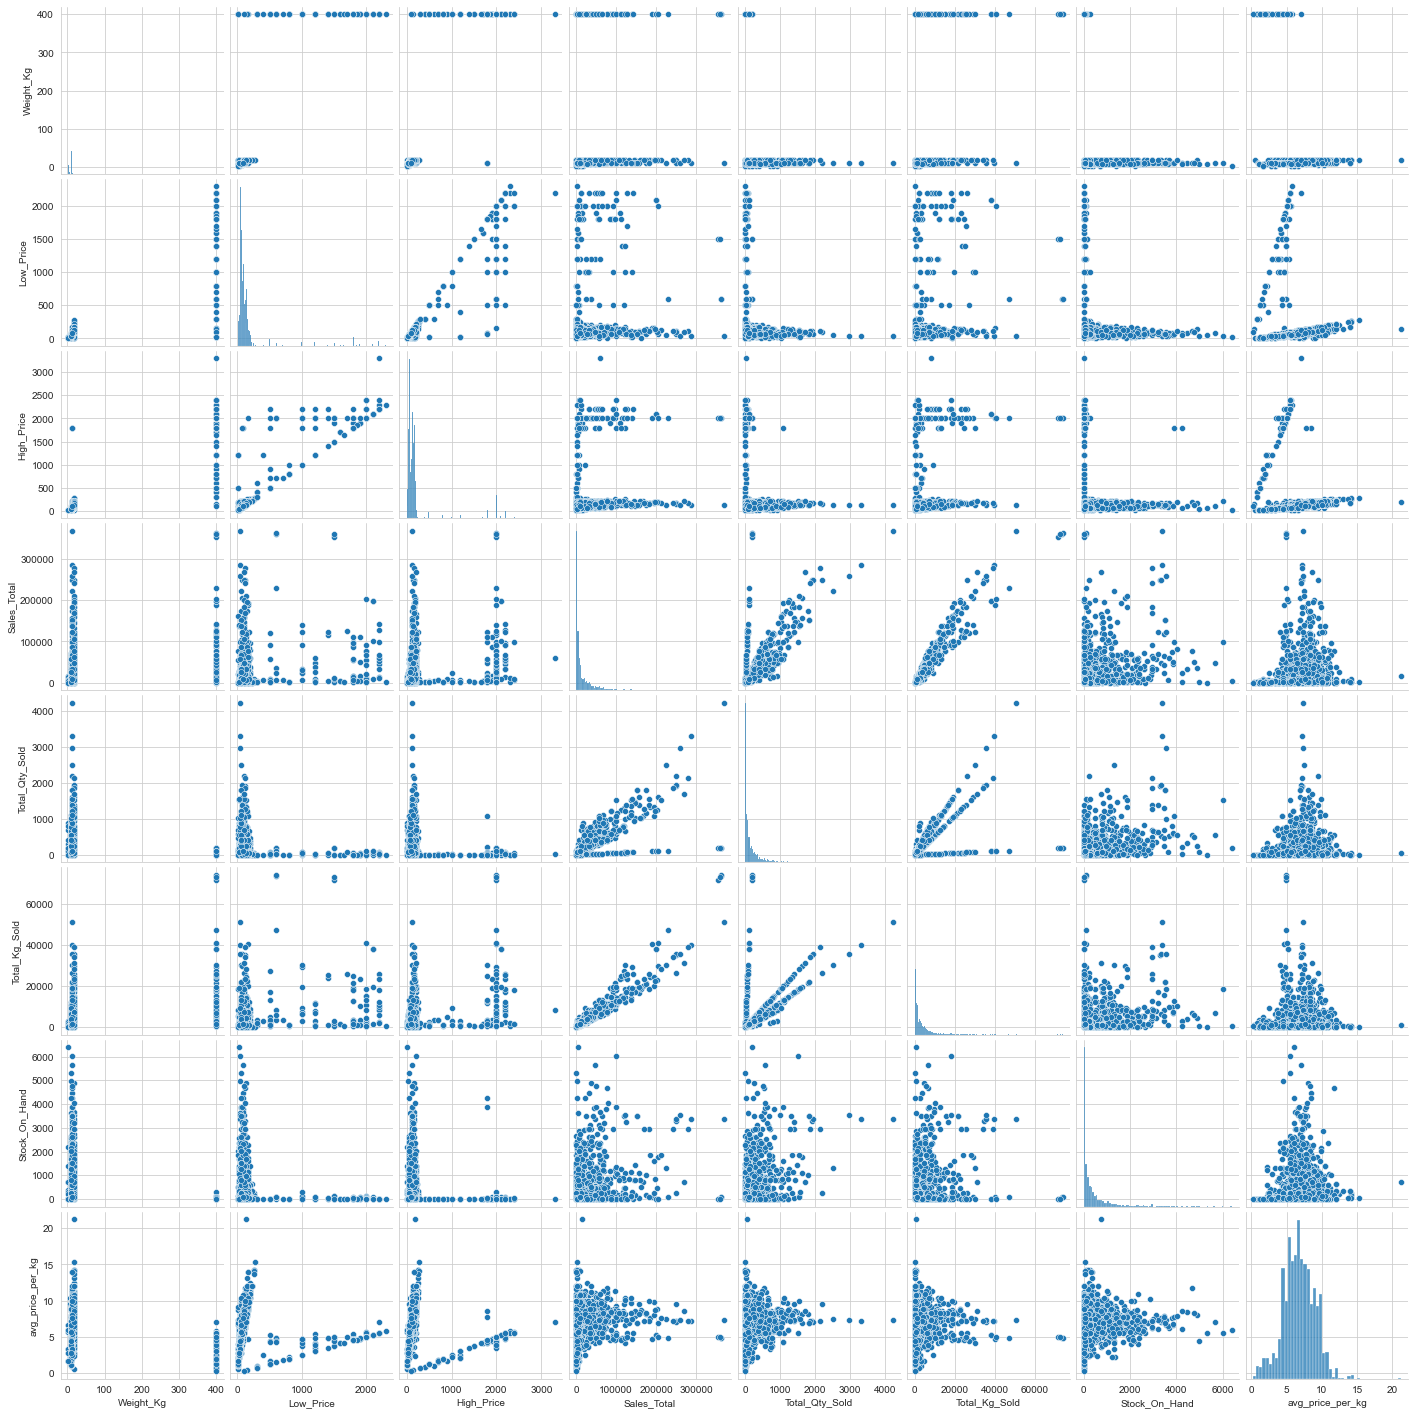

In [20]:
sns.set_style("whitegrid");
sns.pairplot(golden_train);
plt.show();

# Feature Engineering

**Feature engineering** is the process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

Looking at the columns of the dataset we see that there are two columns (Low_Price, High_Price) that contain the highest and lowest prices the products were sold at. We will add another column containing the difference between Highest and lowest prices.

In [21]:
golden_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In the dataset, the entries "Date" column is in string format. We will set this to a Datetime object and split the Date into day, month and year. We will also add day of the week to explore whether the day of the week has an impact on the price of the product.

In [22]:
golden_train['Date']= pd.to_datetime(train['Date'])

Next we will look at the "Size_Grade" column to determine whether there is a "Size_Grade/s" ranking

In [23]:
golden_train.groupby("Size_Grade").mean().sort_values(by="avg_price_per_kg")

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Size_Grade,,,,,,,,
1U,18.300000,80.000000,120.000000,4690.000000,57.500000,1052.250000,53.000000,4.860000
2S,25.643506,86.266234,96.967532,8107.775974,154.711039,1539.692532,393.516234,4.945422
2U,9.117647,44.117647,50.000000,3152.941176,68.000000,621.411765,52.294118,5.112941
2X,9.434615,50.576923,57.692308,4580.000000,85.923077,774.100000,375.538462,5.780000
2M,17.748276,68.012931,76.017241,8383.793103,143.181034,1403.042241,237.413793,5.840043
2L,9.066667,50.891667,59.516667,3935.883333,71.650000,646.066667,162.400000,5.990667
1S,91.681579,350.118421,450.522556,38240.082707,276.693609,6012.439662,611.154135,6.674192
1M,29.971787,154.341693,177.043887,15018.291536,131.316614,1908.378370,361.755486,7.673009
1L,17.662667,131.240000,168.693333,31623.333333,203.844444,3680.436889,435.520000,8.528889


Grouping the data by "**Size_Grade**" shows us that the size grade indeed has a ranking order ranging from "**1U**" (Lowest average price per kg) all the way up to "**1X**" (Highest average price per kg). With this knowledge we can now change the values of "**Size_Grade**" to numerical values indicating their rank.

In [24]:
# Create Dictionary to hold new numerical ranking values
size_grade_rank = {'1U' : 1,
              '2S' : 2,
              '2U' : 3,
              '2X' : 4,
              '2M' : 5,
              '2L' : 6,
              '1S' : 7,
              '1M' : 8,
              '1L' : 9,
              '1X' : 10}

# Replace values according to dict
golden_train.replace({"Size_Grade": size_grade_rank}, inplace=True)

golden_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,9,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,5,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,7,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,7,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [25]:
golden_train.groupby("Container").mean().sort_values(by="avg_price_per_kg")

,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Container,,,,,,,,,
IA400,6.553957,400.0,1334.532374,1628.417266,44382.661871,23.287770,9315.107914,22.460432,3.891942
AC030,5.096774,3.0,12.290323,12.806452,2760.419355,166.774194,500.322581,489.161290,4.222903
DT063,3.000000,6.3,27.500000,27.500000,129.166667,7.833333,49.350000,25.500000,4.366667
JG110,3.635294,11.0,56.470588,63.411765,15306.058824,248.023529,2728.258824,165.164706,5.302235
JE090,3.916814,9.0,47.495575,56.196460,6278.959292,122.739823,1104.658407,332.764602,5.643841
M9125,8.666667,12.5,86.666667,91.666667,8063.333333,91.666667,1145.833333,0.000000,6.940000
M6125,8.100000,12.5,87.000000,89.500000,2686.500000,37.000000,462.500000,76.500000,7.016000
EC120,7.299107,12.0,80.982143,110.962054,25202.078125,274.685268,3296.223214,591.854911,7.553973
EF120,7.148649,12.0,94.540541,102.918919,5901.432432,65.851351,790.216216,135.459459,8.073378


In [26]:
# Create Dictionary to hold new numerical ranking values
container_rank = {'IA400' : 1,
                  'AC030' : 2,
                  'DT063' : 3,
                  'JG110' : 4,
                  'JE090' : 5,
                  'M9125' : 6,
                  'M6125' : 7,
                  'EC120' : 8,
                  'EF120' : 9,
                  'EG140' : 10,
                  'M4183' : 11}

# Replace values according to dict
# golden_train.replace({"Container": container_rank}, inplace=True)

golden_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,9,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,5,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,7,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,7,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [27]:
golden_train.groupby("Province").mean().sort_values(by="avg_price_per_kg")

,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Province,,,,,,,,,
NATAL,4.594595,114.490991,174.360360,275.297297,6049.171171,59.315315,1446.497297,9.792793,3.301532
EASTERN CAPE,6.145631,16.482039,81.393204,92.524272,2618.533981,45.024272,484.619903,112.752427,5.610388
ORANGE FREE STATE,7.777778,57.944444,302.888889,308.000000,19922.444444,159.555556,2458.266667,17.333333,5.952222
TRANSVAAL,6.333333,11.600000,64.400000,83.866667,36090.000000,487.800000,5840.800000,23.666667,6.257333
WEST COAST,6.039683,12.057143,82.658730,87.587302,7064.039683,113.579365,1196.164286,134.952381,6.563889
CAPE,6.592344,47.603828,209.918660,268.347368,29613.266986,241.177033,4373.549856,589.454545,6.959301
W.CAPE-BERGRIVER ETC,6.984091,24.807273,160.579545,172.359091,12220.538636,112.936364,1561.496818,316.763636,7.871000


In [28]:
# Create Dictionary to hold new numerical ranking values
province_rank = {'NATAL' : 1,
              'EASTERN CAPE' : 2,
              'ORANGE FREE STATE' : 3,
              'TRANSVAAL' : 4,
              'WEST COAST' : 5,
              'CAPE' : 6,
              'W.CAPE-BERGRIVER ETC' : 7}

# Replace values according to dict
golden_train.replace({"Province": province_rank}, inplace=True)

golden_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,6,M4183,9,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,6,JG110,5,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,7,JE090,2,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,6,M4183,7,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,2,IA400,7,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [29]:
# golden_train["Day"] = golden_train['Date'].map(lambda x: x.day)
# golden_train["Month"] = golden_train['Date'].map(lambda x: x.month)
# golden_train["Year"] = golden_train['Date'].map(lambda x: x.year)
# golden_train["Day_Of_Week"] = golden_train["Date"].dt.dayofweek

golden_train.drop("Date", axis=1, inplace=True)
golden_train.drop("Container", axis=1, inplace=True)
golden_train.drop("Province", axis=1, inplace=True)
golden_train.drop("Stock_On_Hand", axis=1, inplace=True)
# train.drop("Weight_Kg", axis=1, inplace=True)
# golden_train.drop("Total_Kg_Sold", axis=1, inplace=True)
# train.drop("Total_Qty_Sold", axis=1, inplace=True)

# train.drop("Size_Grade", axis=1, inplace=True)
# golden_train.drop("Commodities", axis=1, inplace=True)

In [30]:
golden_train.head()


,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,avg_price_per_kg
1,9,18.3,150.0,170.0,51710.0,332,6075.6,8.51
7,5,11.0,50.0,50.0,16000.0,320,3520.0,4.55
24,2,9.0,55.0,55.0,990.0,18,162.0,6.11
40,7,18.3,80.0,120.0,32020.0,388,7100.4,4.51
69,7,400.0,1800.0,1800.0,1800.0,1,400.0,4.50


In [31]:
dummy_df = pd.get_dummies(golden_train)
dummy_df.head()

,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,avg_price_per_kg
1,9,18.3,150.0,170.0,51710.0,332,6075.6,8.51
7,5,11.0,50.0,50.0,16000.0,320,3520.0,4.55
24,2,9.0,55.0,55.0,990.0,18,162.0,6.11
40,7,18.3,80.0,120.0,32020.0,388,7100.4,4.51
69,7,400.0,1800.0,1800.0,1800.0,1,400.0,4.50


In [32]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

In [33]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Size_Grade,0.521919
Sales_Total,0.108473
Total_Qty_Sold,0.087536
Total_Kg_Sold,-0.001007
Low_Price,-0.141740
High_Price,-0.164496
Weight_Kg,-0.337886


# Feature Selection

The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model.

Before we decide which features to use in our model, we should take a look at the distribution of our target variable.

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

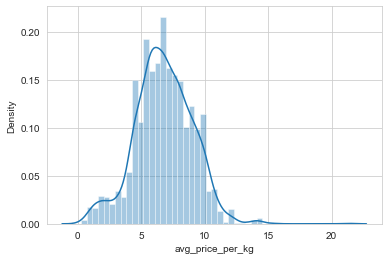

In [34]:
# target distribution
sns.distplot(dummy_df.avg_price_per_kg, kde=True)

In [35]:
dummy_df.shape

(1952, 8)

# Training And Predicting

In [36]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)


    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [37]:
# Create model object
# model = Lasso(alpha=0.01)
model = DecisionTreeRegressor(max_depth=8, random_state=42)

In [38]:
y = dummy_df['avg_price_per_kg']
dummy_df.drop("avg_price_per_kg", axis=1, inplace=True)
X = dummy_df
y.shape

(1952,)

In [39]:
# Create standardization object
scaler = RobustScaler()

In [40]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [41]:
# fit the model to the data and make predictions - OverallQual

fit_and_evaluate(model,X_scaled,y)

{'Train RMSE': 0.4921216552672794,
 'Train R^2': 0.9530175157002488,
 'Test RMSE': 0.6932188666088425,
 'Test R^2': 0.8964351343728351}

In [42]:
test['Date']= pd.to_datetime(test['Date'])
# test["Day"] = test['Date'].map(lambda x: x.day)
# test["Month"] = test['Date'].map(lambda x: x.month)
# test["Year"] = test['Date'].map(lambda x: x.year)
# test["Day_Of_Week"] = test["Date"].dt.dayofweek

In [43]:
# Replace values according to dict
test.replace({"Size_Grade": size_grade_rank}, inplace=True)
# test.replace({"Container": container_rank}, inplace=True)
test.replace({"Province": province_rank}, inplace=True)

test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,7,EC120,8,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,7,M4183,10,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,7,EC120,7,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,7,M4183,8,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,7,M4183,9,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [44]:
test.drop("Date", axis=1, inplace=True)
test.drop("Commodities", axis=1, inplace=True)
# test.drop("Weight_Kg", axis=1, inplace=True)
# test.drop("Total_Kg_Sold", axis=1, inplace=True)
test.drop("Stock_On_Hand", axis=1, inplace=True)
test.drop("Container", axis=1, inplace=True)
test.drop("Province", axis=1, inplace=True)
# test.drop("Size_Grade", axis=1, inplace=True)

In [45]:
X_test = pd.get_dummies(test)

In [46]:
test_index = X_test.Index

X_test.drop("Index", axis=1, inplace=True)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled.shape

(685, 7)

In [47]:
X_test.columns

Index(['Size_Grade', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total',
       'Total_Qty_Sold', 'Total_Kg_Sold'],
      dtype='object')

In [48]:
dummy_df.columns

Index(['Size_Grade', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total',
       'Total_Qty_Sold', 'Total_Kg_Sold'],
      dtype='object')

In [49]:
preds = model.predict(X_test_scaled)

In [50]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {
     'Index': test_index,
     'avg_price_per_kg': preds
    })

In [51]:
submission.head()

,Index,avg_price_per_kg
0,1,10.712308
1,2,11.830833
2,3,9.880137
3,4,8.515000
4,5,7.835957


In [52]:
submission.to_csv("submission_DecisionTree.csv", index=False)